In [8]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [7]:
!pip install open3d pandas tqdm matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [1]:
# 0) Sanity: you should see a GPU
!nvidia-smi

Mon Nov 10 07:54:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# 1) Install CUDA 11.8 toolkit into the VM
!wget -q https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-keyring_1.1-1_all.deb
!dpkg -i cuda-keyring_1.1-1_all.deb
!apt-get update -qq
!apt-get install -y cuda-toolkit-11-8


(Reading database ... 125082 files and directories currently installed.)
Preparing to unpack cuda-keyring_1.1-1_all.deb ...
Unpacking cuda-keyring (1.1-1) over (1.1-1) ...
Setting up cuda-keyring (1.1-1) ...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  ca-certificates-java cuda-cccl-11-8 cuda-command-line-tools-11-8
  cuda-compiler-11-8 cuda-cudart-11-8 cuda-cudart-dev-11-8 cuda-cuobjdump-11-8
  cuda-cupti-11-8 cuda-cupti-dev-11-8 cuda-cuxxfilt-11-8
  cuda-documentation-11-8 cuda-driver-dev-11-8 cuda-gdb-11-8
  cuda-libraries-11-8 cuda-libraries-dev-11-8 cuda-memcheck-11-8
  cuda-nsight-11-8 cuda-nsight-compute-11-8 cuda-nsight-systems-11-8
  cuda-nvcc-11-8 cuda-nvdisasm-11-8 cuda-nvml-dev-11-8 

In [3]:
!export CUDA_HOME=/usr/local/cuda-11.8 && \
export PATH=$CUDA_HOME/bin:$PATH && \
export LD_LIBRARY_PATH=$CUDA_HOME/lib64:$LD_LIBRARY_PATH && \
nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [4]:
# 3) Install matching PyTorch (cu118) and build deps
!pip install -q torch==2.3.1+cu118 torchvision==0.18.1+cu118 torchaudio==2.3.1+cu118 -f https://download.pytorch.org/whl/torch_stable.html
!apt-get install -y ninja-build
!pip install -q ninja


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.6/839.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
# 4) Clean any failed builds
!rm -rf /root/.cache/torch_extensions


In [6]:
# 5) Build ONLY the PointNet2 CUDA ops (subdirectory install)
#    IMPORTANT: run in the *same cell* where CUDA_HOME is exported (or re-export it).
%%bash
export CUDA_HOME=/usr/local/cuda-11.8
export PATH=$CUDA_HOME/bin:$PATH
export LD_LIBRARY_PATH=$CUDA_HOME/lib64:$LD_LIBRARY_PATH
pip install -v "git+https://github.com/erikwijmans/Pointnet2_PyTorch.git#egg=pointnet2_ops&subdirectory=pointnet2_ops_lib"


Using pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)
  Cloning https://github.com/erikwijmans/Pointnet2_PyTorch.git to /tmp/pip-install-9b3xx2w2/pointnet2-ops_e8cf6058fb824be9a3d91e56a1e57780
  Resolved https://github.com/erikwijmans/Pointnet2_PyTorch.git to commit b5ceb6d9ca0467ea34beb81023f96ee82228f626
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pointnet2_ops: filename=pointnet2_ops-3.0.0-cp312-cp312-linux_x86_64.whl size=8821282 sha256=43b984ceacda42ba8cd7658c5be744d4ca33e7de33d41c0ce046cfeb6800e909
  Stored in directory: /tmp/pip-ephem-wheel-cache-u2_77fru/wheels/e3/8a/f5/93316dcd272a2b99b20f871c7465287c7325c92039fb555162
Successfully built pointnet2_ops


  Running command git version
  git version 2.34.1
  Running command git clone --filter=blob:none https://github.com/erikwijmans/Pointnet2_PyTorch.git /tmp/pip-install-9b3xx2w2/pointnet2-ops_e8cf6058fb824be9a3d91e56a1e57780
  Cloning into '/tmp/pip-install-9b3xx2w2/pointnet2-ops_e8cf6058fb824be9a3d91e56a1e57780'...
  Running command git rev-parse HEAD
  b5ceb6d9ca0467ea34beb81023f96ee82228f626
  Running command git rev-parse HEAD
  b5ceb6d9ca0467ea34beb81023f96ee82228f626
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-4qf8yrvx/pointnet2_ops.egg-info
  writing /tmp/pip-pip-egg-info-4qf8yrvx/pointnet2_ops.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-4qf8yrvx/pointnet2_ops.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-4qf8yrvx/pointnet2_ops.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-4qf8yrvx/pointnet2_ops.egg-info/top_level.txt
  writing manifest file '/tm

In [ ]:
# 6) Verify versions and import
import os, torch
print("torch:", torch.__version__, "torch.cuda:", torch.version.cuda, "cuda.is_available:", torch.cuda.is_available())
print("CUDA_HOME:", os.environ.get("CUDA_HOME"))

from pointnet2_ops.pointnet2_modules import PointnetFPModule, PointnetSAModule
print("Import OK")


torch: 2.3.1+cu118 torch.cuda: 11.8 cuda.is_available: True
CUDA_HOME: None
Import OK


Epoch 1/100: 100%|██████████| 35/35 [00:17<00:00,  2.00it/s]


Epoch 1: Train Loss=0.7000, Val Loss=0.6931, Train Acc=0.481, Val Acc=0.676
Best model saved at epoch 1 with val loss 0.6931


Epoch 2/100: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]


Epoch 2: Train Loss=0.6936, Val Loss=0.6992, Train Acc=0.504, Val Acc=0.480


Epoch 3/100: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]


Epoch 3: Train Loss=0.6933, Val Loss=0.6986, Train Acc=0.442, Val Acc=0.498


Epoch 4/100: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]


Epoch 4: Train Loss=0.6933, Val Loss=0.7047, Train Acc=0.397, Val Acc=0.324


Epoch 5/100: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]


Epoch 5: Train Loss=0.6932, Val Loss=0.6962, Train Acc=0.487, Val Acc=0.520


Epoch 6/100: 100%|██████████| 35/35 [00:17<00:00,  2.00it/s]


Epoch 6: Train Loss=0.6932, Val Loss=0.6944, Train Acc=0.515, Val Acc=0.503


Epoch 7/100: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]


Epoch 7: Train Loss=0.6932, Val Loss=0.6932, Train Acc=0.525, Val Acc=0.674


Epoch 8/100: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]


Epoch 8: Train Loss=0.6932, Val Loss=0.6933, Train Acc=0.523, Val Acc=0.658


Epoch 9/100: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]


Epoch 9: Train Loss=0.6932, Val Loss=0.6932, Train Acc=0.547, Val Acc=0.661


Epoch 10/100: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]


Epoch 10: Train Loss=0.6932, Val Loss=0.6932, Train Acc=0.463, Val Acc=0.667


Epoch 11/100: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]


Epoch 11: Train Loss=0.6931, Val Loss=0.6939, Train Acc=0.580, Val Acc=0.610


Epoch 12/100: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]


Epoch 12: Train Loss=0.6932, Val Loss=0.6931, Train Acc=0.606, Val Acc=0.675


Epoch 13/100: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]


Epoch 13: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.636, Val Acc=0.673
Best model saved at epoch 13 with val loss 0.6931


Epoch 14/100: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]


Epoch 14: Train Loss=0.6932, Val Loss=0.6931, Train Acc=0.606, Val Acc=0.675
Best model saved at epoch 14 with val loss 0.6931


Epoch 15/100: 100%|██████████| 35/35 [00:17<00:00,  2.00it/s]


Epoch 15: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.583, Val Acc=0.676


Epoch 16/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 16: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.618, Val Acc=0.676


Epoch 17/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 17: Train Loss=0.6932, Val Loss=0.6931, Train Acc=0.620, Val Acc=0.675


Epoch 18/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 18: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.644, Val Acc=0.676


Epoch 19/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 19: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.646, Val Acc=0.676


Epoch 20/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 20: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.657, Val Acc=0.675


Epoch 21/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 21: Train Loss=0.6931, Val Loss=0.6932, Train Acc=0.614, Val Acc=0.638


Epoch 22/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 22: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.626, Val Acc=0.675


Epoch 23/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 23: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 24/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 24: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.647, Val Acc=0.675


Epoch 25/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 25: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.630, Val Acc=0.674


Epoch 26/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 26: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.636, Val Acc=0.675


Epoch 27/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 27: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.659, Val Acc=0.675


Epoch 28/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 28: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.654, Val Acc=0.675


Epoch 29/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 29: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 30/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 30: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 31/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 31: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.649, Val Acc=0.675


Epoch 32/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 32: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 33/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 33: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 34/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 34: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 35/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 35: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 36/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 36: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 37/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 37: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 38/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 38: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 39/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 39: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 40/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 40: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 41/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 41: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 42/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 42: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 43/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 43: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 44/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 44: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 45/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 45: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 46/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 46: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 47/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 47: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 48/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 48: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 49/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 49: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 50/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 50: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 51/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 51: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 52/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 52: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 53/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 53: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 54/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 54: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 55/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 55: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 56/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 56: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 57/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 57: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 58/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 58: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 59/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 59: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 60/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 60: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 61/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 61: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 62/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 62: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.674


Epoch 63/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 63: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 64/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 64: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 65/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 65: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 66/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 66: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 67/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 67: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 68/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 68: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 69/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 69: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.660, Val Acc=0.675


Epoch 70/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 70: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 71/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 71: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 72/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 72: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 73/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 73: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 74/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 74: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 75/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 75: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 76/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 76: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 77/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 77: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 78/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 78: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 79/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 79: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 80/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 80: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 81/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 81: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 82/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 82: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 83/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 83: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 84/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 84: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 85/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 85: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 86/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 86: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 87/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 87: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 88/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 88: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 89/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 89: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 90/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 90: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 91/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 91: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 92/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 92: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 93/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 93: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 94/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 94: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 95/100: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]


Epoch 95: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 96/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 96: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 97/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 97: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.660, Val Acc=0.675


Epoch 98/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 98: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Epoch 99/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 99: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.676


Epoch 100/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 100: Train Loss=0.6931, Val Loss=0.6931, Train Acc=0.661, Val Acc=0.675


Testing: 100%|██████████| 11/11 [00:16<00:00,  1.47s/it]



--- Výsledky na testovacej množine ---
Accuracy: 0.6284
Precision: 0.0000
Recall:    0.0000
F1 score:  0.0000


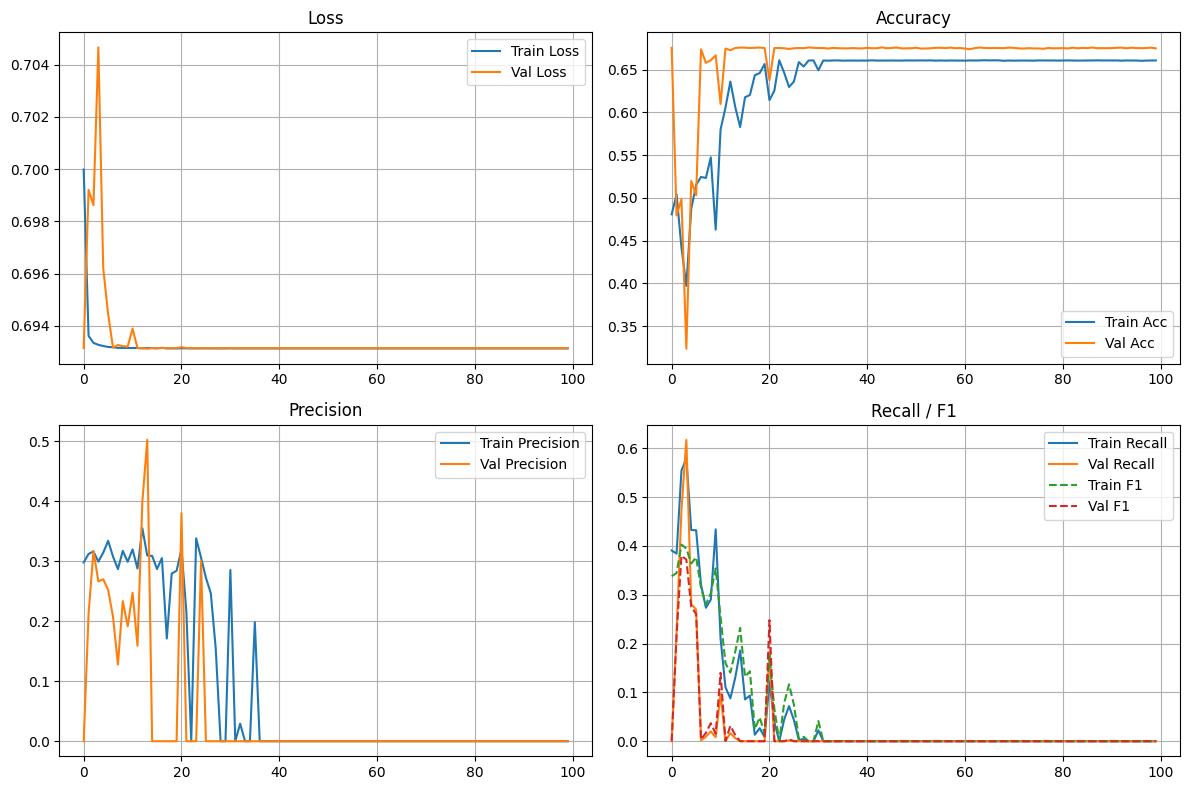

In [16]:
import os
import ast
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import open3d as o3d
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from pointnet2_ops.pointnet2_modules import PointnetFPModule, PointnetSAModuleMSG


# =====================
#   HYPERPARAMETRE
# =====================
BATCH_SIZE = 2
LR = 0.0025
WEIGHT_DECAY = 1e-4
LR_DECAY_FACTOR = 0.5
LR_DECAY_STEP = 20
EPOCHS = 100
N_CLASSES = 2
N_POINTS = 62673
TRAIN_RATIO, VAL_RATIO, TEST_RATIO = 0.7, 0.1, 0.2
SEED = 42

# =====================
#   NASTAVENIA
# =====================
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

DATA_DIR = "/content/gdrive/MyDrive/diplomova_praca/dataset/normalized_centered_voxelized_models_0.0025/"
PC_INFO = os.path.join(DATA_DIR, "point_counts.csv")
LABEL_INFO = os.path.join(DATA_DIR, "voxel_labels_0.0025.csv")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =====================
#   DATASET
# =====================

class BranchSegmentationDataset(Dataset):
    def __init__(self, data_dir, pc_info_path, label_path, n_points):
        self.data_dir = data_dir
        self.pc_info = pd.read_csv(pc_info_path)
        self.labels_df = pd.read_csv(label_path)
        self.n_points = n_points

        # Map tree name (without _merged_teaser.ply) to label array
        self.labels_df['labels'] = self.labels_df['labels'].apply(ast.literal_eval)
        label_dict = dict(zip(self.labels_df['tree'], self.labels_df['labels']))

        self.pc_info = self.pc_info[self.pc_info['file_name'].str.replace('_voxelized.ply', '').isin(label_dict.keys())]
        self.files = self.pc_info['file_name'].tolist()
        self.labels = [label_dict[f.replace('_voxelized.ply', '')] for f in self.files]

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_name = self.files[idx]
        label_array = np.array(self.labels[idx], dtype=np.int64)

        pcd = o3d.io.read_point_cloud(os.path.join(self.data_dir, file_name))
        pts = np.asarray(pcd.points, dtype=np.float32)

        # Match labels and points (downsample/upsample if needed)
        min_len = min(len(pts), len(label_array))
        pts, label_array = pts[:min_len], label_array[:min_len]

        if min_len > self.n_points:
            choice = np.random.choice(min_len, self.n_points, replace=False)
        else:
            choice = np.random.choice(min_len, self.n_points, replace=True)

        pts = pts[choice, :]
        label_array = label_array[choice]

        pts = torch.tensor(pts).float().T  # (3, N)
        labels = torch.tensor(label_array).long()  # (N,)
        return pts, labels


# =====================
#   MODEL (PointNet++)
# =====================
class PointNet2SemSegMSG(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.sa1 = PointnetSAModuleMSG(
            npoint=1024,
            radii=[0.1, 0.2, 0.4],
            nsamples=[16, 32, 128],
            mlps=[[0, 32, 32, 64], [0, 64, 64, 128], [0, 64, 96, 128]],
            use_xyz=True
        )
        self.sa2 = PointnetSAModuleMSG(
            npoint=256,
            radii=[0.4, 0.8],
            nsamples=[32, 64],
            mlps=[[320, 128, 128, 256], [320, 128, 196, 256]],
            use_xyz=True
        )
        self.fp1 = PointnetFPModule(mlp=[512 + 320, 256, 256])  # correct: 832 input channels
        self.fp2 = PointnetFPModule(mlp=[256, 256, 128, num_classes])

    def forward(self, xyz):
        xyz = xyz.transpose(1, 2).contiguous()  # (B, N, 3)
        l1_xyz, l1_features = self.sa1(xyz, None)
        l2_xyz, l2_features = self.sa2(l1_xyz, l1_features)

        l1_features = self.fp1(l1_xyz, l2_xyz, l1_features, l2_features)
        l0_features = self.fp2(xyz, l1_xyz, None, l1_features)

        return l0_features  # (B, num_classes, N)
# =====================
#   DÁTA A LOADERY
# =====================
dataset = BranchSegmentationDataset(DATA_DIR, PC_INFO, LABEL_INFO, N_POINTS)

train_len = int(TRAIN_RATIO * len(dataset))
val_len = int(VAL_RATIO * len(dataset))
test_len = len(dataset) - train_len - val_len
train_ds, val_ds, test_ds = random_split(dataset, [train_len, val_len, test_len])

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)

# =====================
#   TRÉNING
# =====================
model = PointNet2SemSegMSG(num_classes=N_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=LR_DECAY_STEP, gamma=LR_DECAY_FACTOR)

train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_precisions, val_precisions = [], []
train_recalls, val_recalls = [], []
train_f1s, val_f1s = [], []
best_val_loss = float('inf')

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0
    all_preds, all_labels = [], []

    for pts, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        pts, labels = pts.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(pts)
        loss = criterion(outputs.reshape(-1, N_CLASSES), labels.reshape(-1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)  # (B, N)
        all_preds.extend(preds.cpu().numpy().ravel())
        all_labels.extend(labels.cpu().numpy().ravel())


    # metriky pre tréning
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accs.append(accuracy_score(all_labels, all_preds))
    train_precisions.append(precision_score(all_labels, all_preds, average='binary', zero_division=0))
    train_recalls.append(recall_score(all_labels, all_preds, average='binary', zero_division=0))
    train_f1s.append(f1_score(all_labels, all_preds, average='binary', zero_division=0))

    # =====================
    # Validácia
    # =====================
    model.eval()
    val_loss = 0
    val_preds, val_labels_all = [], []

    with torch.no_grad():
        for pts, labels in val_loader:
            pts, labels = pts.to(device), labels.to(device)
            outputs = model(pts)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_preds.extend(preds.cpu().numpy().flatten())
            val_labels_all.extend(labels.cpu().numpy().flatten())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accs.append(accuracy_score(val_labels_all, val_preds))
    val_precisions.append(precision_score(val_labels_all, val_preds, average='binary', zero_division=0))
    val_recalls.append(recall_score(val_labels_all, val_preds, average='binary', zero_division=0))
    val_f1s.append(f1_score(val_labels_all, val_preds, average='binary', zero_division=0))

    scheduler.step()

    print(f"Epoch {epoch+1}: "
          f"Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}, "
          f"Train Acc={train_accs[-1]:.3f}, Val Acc={val_accs[-1]:.3f}")
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        metrics = {
          "train_losses": train_losses,
          "val_losses": val_losses,
          "train_accs": train_accs,
          "val_accs": val_accs,
          "train_precisions": train_precisions,
          "val_precisions": val_precisions,
          "train_recalls": train_recalls,
          "val_recalls": val_recalls,
          "train_f1s": train_f1s,
          "val_f1s": val_f1s
        }
        torch.save(metrics, "/content/gdrive/MyDrive/diplomova_praca/training_metrics.pt")

        torch.save(model.state_dict(),
                   "/content/gdrive/MyDrive/diplomova_praca/best_pointnet2_model.pth")
        print(f"Best model saved at epoch {epoch+1} with val loss {avg_val_loss:.4f}")

# =====================
#   TESTOVANIE
# =====================
model.eval()
test_preds, test_labels_all = [], []
with torch.no_grad():
    for pts, labels in tqdm(test_loader, desc="Testing"):
        pts, labels = pts.to(device), labels.to(device)
        outputs = model(pts)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.cpu().numpy().flatten())
        test_labels_all.extend(labels.cpu().numpy().flatten())

test_acc = accuracy_score(test_labels_all, test_preds)
test_prec = precision_score(test_labels_all, test_preds, average='binary', zero_division=0)
test_rec = recall_score(test_labels_all, test_preds, average='binary', zero_division=0)
test_f1 = f1_score(test_labels_all, test_preds, average='binary', zero_division=0)

print(f"\n--- Výsledky na testovacej množine ---")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall:    {test_rec:.4f}")
print(f"F1 score:  {test_f1:.4f}")

# =====================
#   VIZUALIZÁCIA
# =====================
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loss
axs[0, 0].plot(train_losses, label='Train Loss')
axs[0, 0].plot(val_losses, label='Val Loss')
axs[0, 0].set_title('Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Accuracy
axs[0, 1].plot(train_accs, label='Train Acc')
axs[0, 1].plot(val_accs, label='Val Acc')
axs[0, 1].set_title('Accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Precision
axs[1, 0].plot(train_precisions, label='Train Precision')
axs[1, 0].plot(val_precisions, label='Val Precision')
axs[1, 0].set_title('Precision')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Recall/F1
axs[1, 1].plot(train_recalls, label='Train Recall')
axs[1, 1].plot(val_recalls, label='Val Recall')
axs[1, 1].plot(train_f1s, '--', label='Train F1')
axs[1, 1].plot(val_f1s, '--', label='Val F1')
axs[1, 1].set_title('Recall / F1')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/diplomova_praca/metrics_plot_original.png", dpi=300)
plt.show()